In [25]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [26]:
f = h5py.File('../Outfile_CellInformation_HomDet_2to5GeV.h5','r')

In [27]:
#print(f.keys())

In [28]:
gT = h5py.File('../DATA_PROCESSING/Outfile_TopoClusterTotal.h5','r')
gTA = h5py.File('../DATA_PROCESSING/Outfile_TopoClusterTotalAtl.h5','r')

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt,numpy as np
norm = plt.Normalize()

event_index = 566

fig = plt.figure(figsize=(6*4,8))



ax_list = []
for layer_i in range(6):
    for res_i, res in enumerate(['RealRes','UniformRes']):
    
        ax_list.append( fig.add_subplot(2, 6, layer_i+1+6*res_i, projection='3d') ) 
        if layer_i+1+6*res_i == 1:
            ax_list[-1].set_title('Low Resolution',fontsize=25)
        elif layer_i+1+6*res_i == 7:
            ax_list[-1].set_title('High Resolution',fontsize=25)
        ax_list[-1].view_init(elev=30, azim=-30)

        X = f[res+'_TotalEnergy_Layer'+str(layer_i+1)][event_index]
        X_charged = f[res+'_ChargedEnergy_Layer'+str(layer_i+1)][event_index]
        X_neutral = f[res+'_NeutralEnergy_Layer'+str(layer_i+1)][event_index]
        
        layer_size = X.shape[1]
        X = X.reshape(layer_size,layer_size)
        X_charged = X_charged.reshape(layer_size,layer_size)
        X_neutral = X_neutral.reshape(layer_size,layer_size)
        
        small_x = 2.5*np.ones((layer_size,layer_size))
        
        Z, Y = np.meshgrid(range(layer_size),range(layer_size))
        
        X[X <= 0] = 0
        X[X > 0] = np.log(X[X>0])
        X = X/5
        ax_list[-1].plot_surface(0*small_x, Y, Z, 
                                facecolors=plt.cm.viridis(X))
        
        ax_list[-1].plot_surface(small_x*2, Y, Z, 
                                facecolors=plt.cm.Reds(X_charged),alpha=0.5)
        ax_list[-1].plot_surface(small_x*3, Y, Z, 
                                facecolors=plt.cm.Greens(X_neutral),alpha=0.5)
        
        ax_list[-1].set_xlabel('X')
        ax_list[-1].set_xlim(0,5)
        ax_list[-1].set_ylabel('Y')
        ax_list[-1].set_ylim(0, layer_size)
        ax_list[-1].set_zlabel('Z')
        ax_list[-1].set_zlim(0, layer_size)
        ax_list[-1].set_axis_off()
    
plt.tight_layout()    

plt.show()

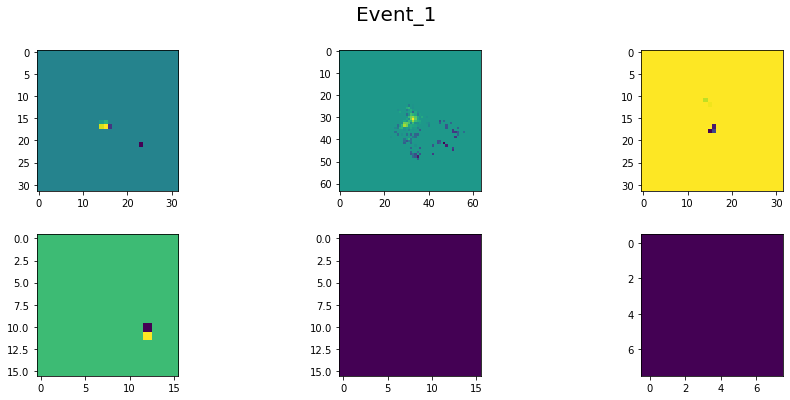

In [57]:
#fig, axs = plt.subplots(1,6)
EV = 1


fig = plt.figure(figsize=(15, 6),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.3, wspace=0.3)

fig.suptitle('Event_'+str(EV), fontsize="20")

for i in range(1,7):    
    ax = fig.add_subplot(2, 3, i)
    CAL = f['RealRes_NeutralEnergy_Layer'+str(i)][EV][0]
    #CAL=np.array([*zip(*CAL)])
    layer_size = CAL.shape[1]
    #print(CAL[0].shape)
    CAL = CAL.reshape(layer_size,layer_size)
    CAL[CAL <= 0] = 0
    CAL[CAL > 0] = np.log(CAL[CAL>0])
    
    ax.imshow(CAL)

fig.savefig('Event_'+str(EV)+'Neutral.png')


In [58]:
CAL = f['RealRes_NeutralEnergy_Layer2'][1][0]




In [30]:
#print(gT['TopoClusters2'][5][0][20:40,30:40])
#print(gTA['TopoClusters4'][0][0])

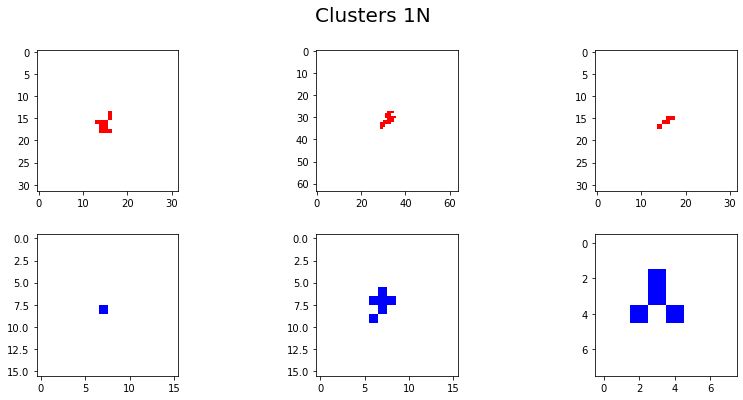

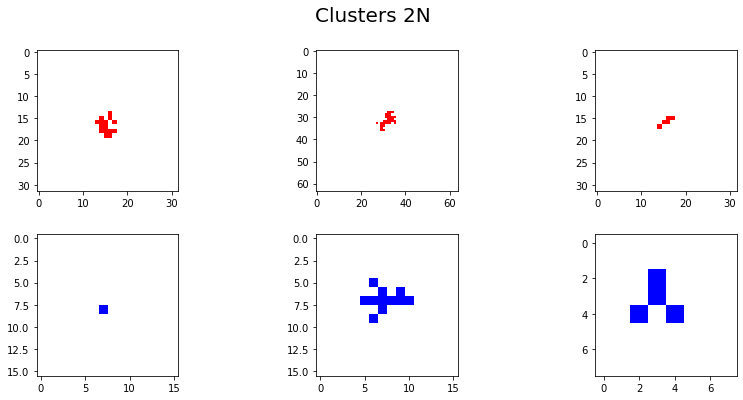

In [53]:
import matplotlib as m
cmap = m.colors.ListedColormap(['white', 'red','blue', 'green', 'black' , 'grey', 'purple'])
bounds = [-0.5,0.5,1.5,2.5, 3.5, 4.5, 5.5, 6.5]
norm = m.colors.BoundaryNorm(bounds, cmap.N)



fig = plt.figure(figsize=(15, 6),facecolor="w", edgecolor='k')
fig.subplots_adjust(hspace=0.3, wspace=0.002)

fig.suptitle('Clusters 1N', fontsize="20")


EV = 1

for i in range(1,7):
    ax = fig.add_subplot(2, 3, i)
    CAL = gT['TopoClusters'+str(i)][EV]
    
    if(i==1 or i==3):
        size=32
    elif(i==4 or i ==5):
        size=16
    elif(i==2):
        size=64
    elif(i==6):
        size = 8
    
    CALL=CAL[0][0:size,0:size]
    ax.imshow(CALL, cmap=cmap, norm=norm)
    
fig.savefig('Clus_Event_'+str(EV)+'_1N.png')

fig = plt.figure(figsize=(15, 6),facecolor="w", edgecolor='k')
fig.subplots_adjust(hspace=0.3, wspace=0.002)
fig.suptitle('Clusters 2N', fontsize="20")


for i in range(1,7):
    ax = fig.add_subplot(2, 3, i)
    CAL = gTA['TopoClusters'+str(i)][EV]
    
    if(i==1 or i==3):
        size=32
    elif(i==4 or i ==5):
        size=16
    elif(i==2):
        size=64
    elif(i==6):
        size = 8
    
    CALL=CAL[0][0:size,0:size]
    ax.imshow(CALL, cmap=cmap, norm=norm)

fig.savefig('Clus_Event_'+str(EV)+'_2N.png')



In [32]:
#print(f['RealRes_TotalEnergy_Layer1'][0][0][13:16, 19:22])
#print(gTA['TopoClusters'+str(1)][0][0][13:16, 19:22])

In [33]:
#Compute total energy in the event
def En_Eve(fi,ev, types):   
    En = 0
    EnL = 0
    for i in range(1,7):
        Lay_En = fi['RealRes_'+str(types)+'Energy_Layer'+str(i)][ev][0]
            
        if(i==1 or i==3):
            size=32
        elif(i==4 or i ==5):
            size=16
        elif(i==2): 
            size=64
        elif(i==6):
            size = 8    
        Lay_En=np.array(Lay_En[0:size,0:size])
        EnL=np.sum(Lay_En)
        #print(EnL,i)
        En = En+EnL      
    return En

#compute the energy in each topo per event
def En_Topo(gi, fi, types, ev):
    En = 0
    EnL = 0
    EnTopo = []
    for i in range(1,7):
        Topo = gi['TopoClusters'+str(i)][ev][0]
        Calo = fi['RealRes_'+str(types)+'Energy_Layer'+str(i)][ev][0]
            
        if(i==1 or i==3):
            size=32
        elif(i==4 or i ==5):
            size=16
        elif(i==2): 
            size=64
        elif(i==6):
            size = 8    
            
        TopoA=np.array(Topo[0:size,0:size])
        CaloA=np.array(Calo[0:size,0:size])

        for X in range(len(TopoA)):
            for Y in range(len(TopoA)): 
                TopoI=int(TopoA[X][Y])
                if TopoI!=0:
                    #print(X, Y, Calo[X][Y],'Topo N =', TopoI, 'layer =', i)
                    if len(EnTopo)<TopoI: EnTopo.append(Calo[X][Y])
                    else: EnTopo[TopoI-1]=EnTopo[TopoI-1]+CaloA[X][Y]     
    return EnTopo

In [34]:
def N_Topo_90(fio, gio, events, types):
    Num_Topo=np.zeros(events)
    Ne90 = np.zeros(10)
    NeN = []
    print("starting loop")
    for ev in range(events):
        if (ev+1)%1000==0: print('still looping',ev)        


        #total energy in the event
        Tot_En_Eve = En_Eve(fio,ev, types)
        #sorted energies in topoclusters
        Topo_En_Sort=np.sort(En_Topo(gio,fio, types, ev))[::-1]

        Fract=0
        i=-1
        while Fract < 0.9 and i<len(Topo_En_Sort)-1:
            i+=1
            Fract=Fract + Topo_En_Sort[i]/Tot_En_Eve

        #Ne90[i+1]+=1
        #if Fract>0.9: 
        NeN.append(i+1)
        
    return NeN



def Count_Topo(gio, events, types):
    Num_Topo=np.zeros(events)
    Ne90 = np.zeros(10)
    NN = []
    print("starting loop")
    for ev in range(events):
        if (ev+1)%1000==0: print('still looping',ev)        
            
        
        #sorted energies in topoclusters
        N_Cl = -1
        for lay in range(1,6):
            Topo = gio['TopoClusters'+str(lay)][ev]
            if np.amax(Topo)>N_Cl:
                N_Cl = np.amax(Topo)
            
        NN.append(int(N_Cl))
        
    return NN




In [35]:
N_Ev=len(gT['TopoClusters1'])
#numb of topoclusters 1N 
T=Count_Topo(gT,N_Ev , 'Total')
#numb of topoclusters up to 90% Tot en
T_90=N_Topo_90(f, gT,N_Ev , 'Total')


starting loop
still looping 999
starting loop
still looping 999


In [36]:
N_Ev=len(gTA['TopoClusters1'])
#numb of topoclusters 2N (ATLAS like)
TA=Count_Topo(gTA,N_Ev , 'Total')
#numb of topoclusters up to 90% Tot en (ATLAS like)
T_90A=N_Topo_90(f, gTA,N_Ev , 'Total')

starting loop
still looping 999
starting loop
still looping 999


In [37]:
def Hist_Plot_Save(types, Dat, n ):
    bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5,5.5, 6.5, 7.5, 8.5]
    tick= bins[:-1]+np.ones(len(bins))[1:]/2

    hist, bins = np.histogram(Dat, bins=bins )
    width = np.diff(bins)
    center = (bins[:-1] + bins[1:]) / 2

    fig, ax = plt.subplots(figsize=(16,9))
    ax.bar(center, hist, align='center', width=width)
    ax.set_xticks(tick)
    ax.set_xlabel(str(n))
    ax.set_ylabel("N. of events")
    #ax.set_ylim([0,6000])
    ax.set_title(str(types))
    #plt.yscale("log")
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +  ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
    
    plt.savefig(str(types)+".png")
    plt.show()

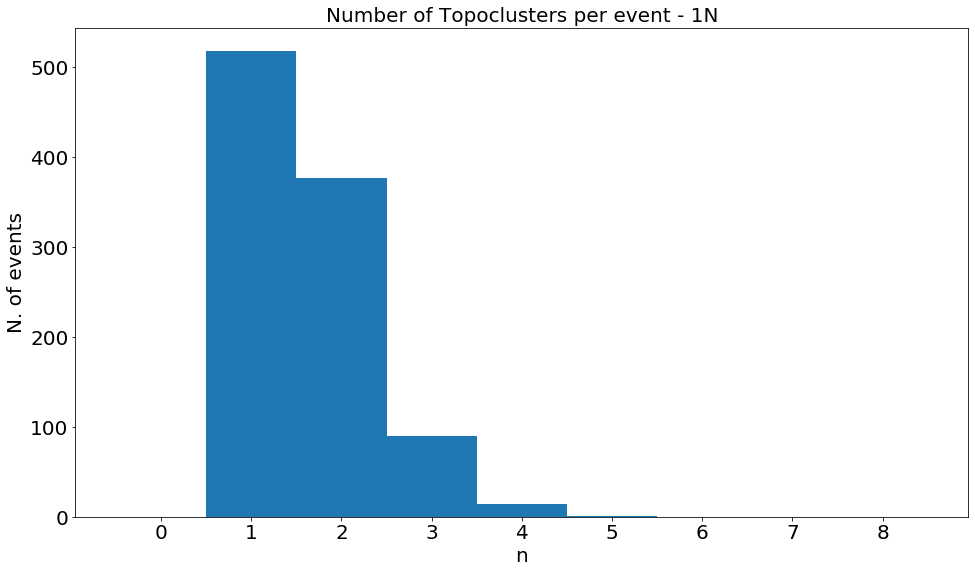

In [45]:
Hist_Plot_Save('Number of Topoclusters per event - 1N', T, "n")

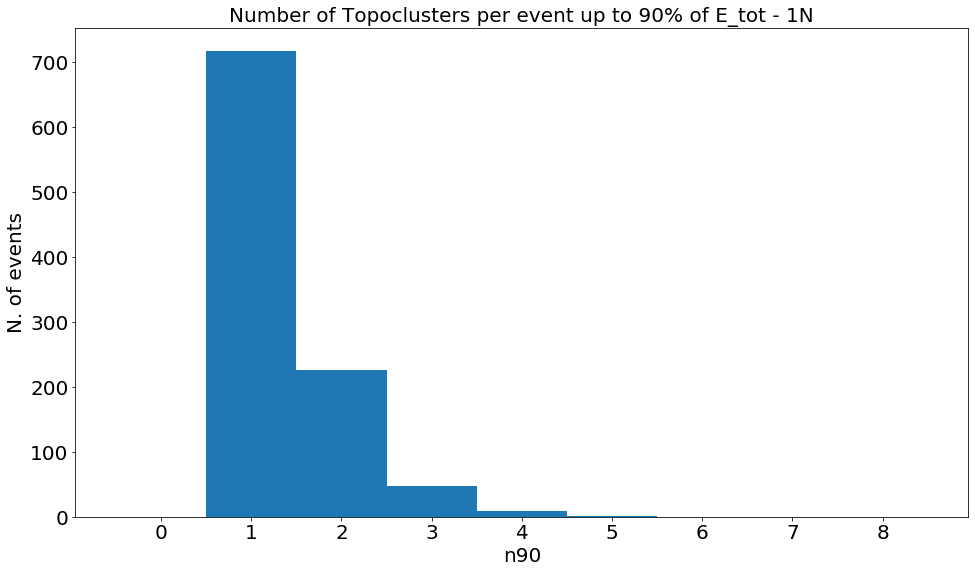

In [46]:
Hist_Plot_Save('Number of Topoclusters per event up to 90% of E_tot - 1N', T_90, "n90")

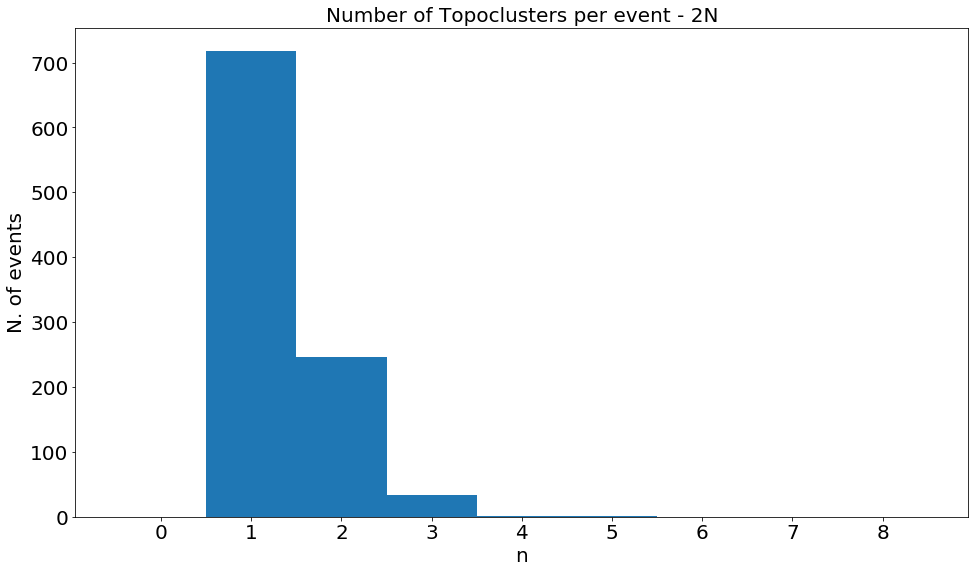

In [49]:
Hist_Plot_Save('Number of Topoclusters per event - 2N', TA, "n")

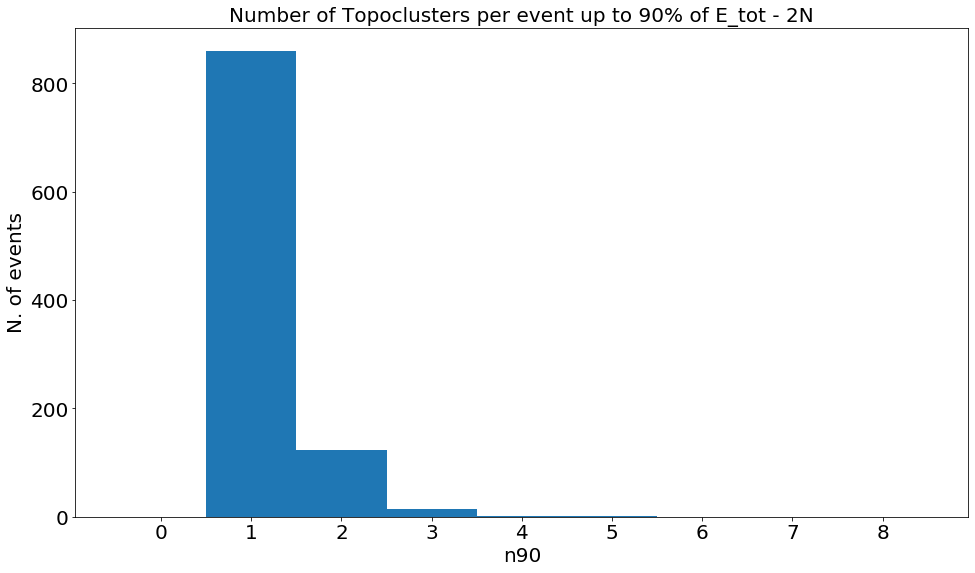

In [50]:
Hist_Plot_Save('Number of Topoclusters per event up to 90% of E_tot - 2N', T_90A, "n90")

In [42]:
N_Ev=len(gT['TopoClusters1'])
N_Topo=Count_Topo(gT,N_Ev , 'Total')
N_TopoA=Count_Topo(gTA,N_Ev , 'Total')

starting loop
still looping 999
starting loop
still looping 999


In [43]:
GT3=[]
GT3A=[]
for i in range(N_Ev):
    if N_Topo[i]>2: GT3.append(i)
    if N_TopoA[i]>2: GT3A.append(i)
print(GT3)
print(GT3A)

[2, 3, 31, 47, 70, 80, 82, 95, 109, 126, 146, 150, 164, 166, 178, 180, 188, 191, 204, 215, 219, 228, 239, 244, 265, 293, 298, 302, 318, 319, 322, 338, 346, 377, 381, 382, 383, 400, 401, 409, 413, 415, 422, 441, 447, 458, 472, 476, 490, 503, 524, 525, 546, 568, 579, 588, 589, 604, 614, 620, 627, 631, 636, 641, 661, 665, 676, 686, 716, 721, 724, 725, 738, 748, 769, 771, 773, 779, 783, 784, 785, 789, 801, 803, 814, 836, 843, 844, 845, 850, 853, 857, 866, 872, 873, 876, 889, 901, 902, 914, 950, 962, 967, 973, 982]
[3, 31, 95, 109, 150, 180, 191, 219, 293, 298, 318, 338, 381, 383, 400, 413, 422, 472, 476, 546, 588, 614, 661, 686, 716, 725, 771, 789, 801, 803, 814, 853, 889, 950, 962, 982]
